In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import nltk
# REGULAR EXPRESSION
import re
import os

from sklearn import decomposition
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/christie/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
#import three lists: titles and wikipedia synopses
titles = open('title_list.txt').read().split('\n')
titles = titles[:100] #ensures that only the first 100 are read in

In [3]:
print(titles[0])

The Godfather


In [4]:
#The wiki synopses and imdb synopses of each movie is seperated by the keywords "BREAKS HERE". 
#Each synoposes may consist of multiple paragraphs.
synopses_wiki = open('synopses_list_wiki.txt').read().split('\n BREAKS HERE')
synopses_wiki = synopses_wiki[:100]

synopses_imdb = open('synopses_list_imdb.txt').read().split('\n BREAKS HERE')
synopses_imdb = synopses_imdb[:100]

In [5]:
synopses = []
for i in range(len(synopses_wiki)):
    item = synopses_wiki[i] + synopses_imdb[i]
    synopses.append(item)

In [6]:
ranks = range(len(titles))

In [7]:
print(synopses_wiki[0])

 Plot  [edit]  [  [  edit  edit  ]  ]  
  On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito's godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter's wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito's youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito's godson   Johnny

In [8]:
print(synopses_imdb[0])



In late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone's daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known to friends and associates as "Godfather." He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors because, according to Italian tradition, "no Sicilian can refuse a request on his daughter's wedding day." One of the men who asks the Don for a favor is Amerigo Bonasera, a successful mortician and acquaintance of the Don, whose daughter was brutally beaten by two young men because she refused their advances; the men received minimal punishment. The Don is disappointed in Bonasera, who'd avoided most contact with the Don due to Corleone's nefarious business dealings. The Don's wife is godmother to Bonasera's shamed daughter, a relationship the Don uses to extract new loyalty from the undertaker. The Don agrees to have his men punis

In [10]:
print(type(ranks))

<class 'range'>


In [11]:
print(range[0])

TypeError: 'type' object is not subscriptable

In [12]:
print(ranks[0])

0


In [13]:
print(ranks[1])

1


In [14]:
print(ranks)

range(0, 100)


In [15]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english')

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])

We use 179 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [16]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# tokenization and stemming
def tokenization_and_stemming(text):
    # exclude stop words and tokenize the document, generate a list of string 
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
            
    # stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

# tokenization without stemming
def tokenization(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [17]:
# tokenization and stemming
tokenization_and_stemming("she looked at her father's arm.")

['look', 'father', "'s", 'arm']

In [18]:
# 1. do tokenization and stemming for all the documents
# 2. also just do tokenization for all the documents
# the goal is to create a mapping from stemmed words to original tokenized words for result interpretation.
docs_stemmed = []
docs_tokenized = []
for i in synopses:
    tokenized_and_stemmed_results = tokenization_and_stemming(i)
    docs_stemmed.extend(tokenized_and_stemmed_results)
    
    tokenized_results = tokenization(i)
    docs_tokenized.extend(tokenized_results)

In [19]:
vocab_frame_dict = {docs_stemmed[x]:docs_tokenized[x] for x in range(len(docs_stemmed))}
print (vocab_frame_dict['angel'])

angeles


In [21]:
#define vectorizer parameters
# TfidfVectorizer will help us to create tf-idf matrix
# max_df : maximum document frequency for the given word
# min_df : minimum document frequency for the given word
# max_features: maximum number of words
# use_idf: if not true, we only calculate tf
# stop_words : built-in stop words
# tokenizer: how to tokenize the document
# ngram_range: (min_value, max_value), eg. (1, 3) means the result will include 1-gram, 2-gram, 3-gram
tfidf_model = TfidfVectorizer(max_df=0.8, max_features=2000,
                                 min_df=0, stop_words='english',
                                 use_idf=True, tokenizer=tokenization_and_stemming, ngram_range=(1,3))

tfidf_matrix = tfidf_model.fit_transform(synopses) #fit the vectorizer to synopses

print ("In total, there are " + str(tfidf_matrix.shape[0]) + \
      " synoposes and " + str(tfidf_matrix.shape[1]) + " terms.")

In total, there are 100 synoposes and 2000 terms.


In [22]:
# check the parameters
tfidf_model.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.8,
 'max_features': 2000,
 'min_df': 0,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <function __main__.tokenization_and_stemming(text)>,
 'use_idf': True,
 'vocabulary': None}

In [23]:
# words
tf_selected_words = tfidf_model.get_feature_names()

In [24]:
# print out words
tf_selected_words

["'d",
 "'m",
 "'s apart",
 "'s bodi",
 "'s car",
 "'s death",
 "'s father",
 "'s friend",
 "'s home",
 "'s hous",
 "'s life",
 "'s marriag",
 "'s men",
 "'s mother",
 "'s murder",
 "'s offic",
 "'s plan",
 "'s son",
 "'s voic",
 "'s wife",
 'abandon',
 'abil',
 'abl',
 'aboard',
 'abus',
 'accept',
 'accid',
 'accident',
 'accompani',
 'accomplic',
 'accus',
 'acquaint',
 'act',
 'action',
 'actor',
 'actual',
 'adam',
 'address',
 'admir',
 'admit',
 'adrian',
 'advanc',
 'advantag',
 'adventur',
 'advis',
 'affair',
 'africa',
 'african',
 'african queen',
 'afterward',
 'age',
 'agent',
 'ago',
 'agre',
 'aid',
 'aim',
 'air',
 'aircraft',
 'airport',
 'al',
 'albert',
 'alcohol',
 'alderaan',
 'alex',
 'alexand',
 'ali',
 'alic',
 'alien',
 'aliv',
 'allenbi',
 'allnut',
 'allow',
 'alon',
 'alreadi',
 'altern',
 'alvi',
 'alway',
 'ambush',
 'america',
 'american',
 'ami',
 'andi',
 "andi 's",
 'andrew',
 'angel',
 'angela',
 'anger',
 'angri',
 'angrili',
 'anim',
 'anita',
 'an

In [25]:
# tf-idf matrix
tfidf_matrix

<100x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 31794 stored elements in Compressed Sparse Row format>

In [26]:
# use cosine similarity to check the similarity for two documents
from sklearn.metrics.pairwise import cosine_similarity
cos_matrix = cosine_similarity(tfidf_matrix)
print (cos_matrix)

[[1.         0.01597512 0.0195209  ... 0.02250815 0.02263374 0.04419743]
 [0.01597512 1.         0.03149342 ... 0.01242353 0.01330407 0.01937118]
 [0.0195209  0.03149342 1.         ... 0.01612811 0.0124787  0.04164716]
 ...
 [0.02250815 0.01242353 0.01612811 ... 1.         0.03166906 0.04620866]
 [0.02263374 0.01330407 0.0124787  ... 0.03166906 1.         0.01976279]
 [0.04419743 0.01937118 0.04164716 ... 0.04620866 0.01976279 1.        ]]


In [27]:
# k-means clustering
from sklearn.cluster import KMeans

In [28]:
# number of clusters
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [29]:
# create DataFrame films from all of the input files.
films = { 'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': clusters}
frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster'])

In [30]:
frame.head(10)

,rank,title,cluster
2,0,The Godfather,2
2,1,The Shawshank Redemption,2
3,2,Schindler's List,3
1,3,Raging Bull,1
3,4,Casablanca,3
3,5,One Flew Over the Cuckoo's Nest,3
3,6,Gone with the Wind,3
4,7,Citizen Kane,4
3,8,The Wizard of Oz,3
4,9,Titanic,4


In [31]:
print ("Number of films included in each cluster:")
frame['cluster'].value_counts().to_frame()

Number of films included in each cluster:


,cluster
4,33
3,33
2,22
1,10
0,2


In [32]:
print ("<Document clustering result by K-means>")

#km.cluster_centers_ denotes the importances of each items in centroid.
#We need to sort it in decreasing-order and get the top k items.
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

Cluster_keywords_summary = {}
for i in range(num_clusters):
    print ("Cluster " + str(i) + " words:", end='')
    Cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        Cluster_keywords_summary[i].append(vocab_frame_dict[tf_selected_words[ind]])
        print (vocab_frame_dict[tf_selected_words[ind]] + ",", end='')
    print ()
    #Here ix means index, which is the clusterID of each item.
    #Without tolist, the values result from dataframe is <type 'numpy.ndarray'>
    cluster_movies = frame.ix[i]['title'].values.tolist()
    print ("Cluster " + str(i) + " titles (" + str(len(cluster_movies)) + " movies): ")
    print (", ".join(cluster_movies))
    print ()

<Document clustering result by K-means>
Cluster 0 words:thorwald,blanche,stella,stanley,lisa,jeff,
Cluster 0 titles (2 movies): 
A Streetcar Named Desire, Rear Window

Cluster 1 words:joe,jerry,terry,joey,shane,charlie,
Cluster 1 titles (10 movies): 
Raging Bull, Sunset Blvd., On the Waterfront, Some Like It Hot, An American in Paris, Butch Cassidy and the Sundance Kid, Midnight Cowboy, Rain Man, Fargo, Shane

Cluster 2 words:michael,george,mike,rocky,andy,munny,
Cluster 2 titles (22 movies): 
The Godfather, The Shawshank Redemption, The Godfather: Part II, E.T. the Extra-Terrestrial, The Silence of the Lambs, It's a Wonderful Life, Unforgiven, Rocky, The Philadelphia Story, The Best Years of Our Lives, Jaws, The Treasure of the Sierra Madre, The Deer Hunter, City Lights, A Place in the Sun, Tootsie, The Grapes of Wrath, Close Encounters of the Third Kind, American Graffiti, Pulp Fiction, Rebel Without a Cause, The Third Man

Cluster 3 words:german,captain,forrestal,war,soldiers,nazis,

In [33]:
# use pca to reduce dimensions to 2d for visibility, just want to see if there 2d can give us some insights
# this is not an appropriate method, just a guess.
pca = decomposition.PCA(n_components=2)
tfidf_matrix_np=tfidf_matrix.toarray()
pca.fit(tfidf_matrix_np)
X = pca.transform(tfidf_matrix_np)

xs, ys = X[:, 0], X[:, 1]

#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}
#set up cluster names using a dict
cluster_names = {}
for i in range(num_clusters):
    cluster_names[i] = ", ".join(Cluster_keywords_summary[i])

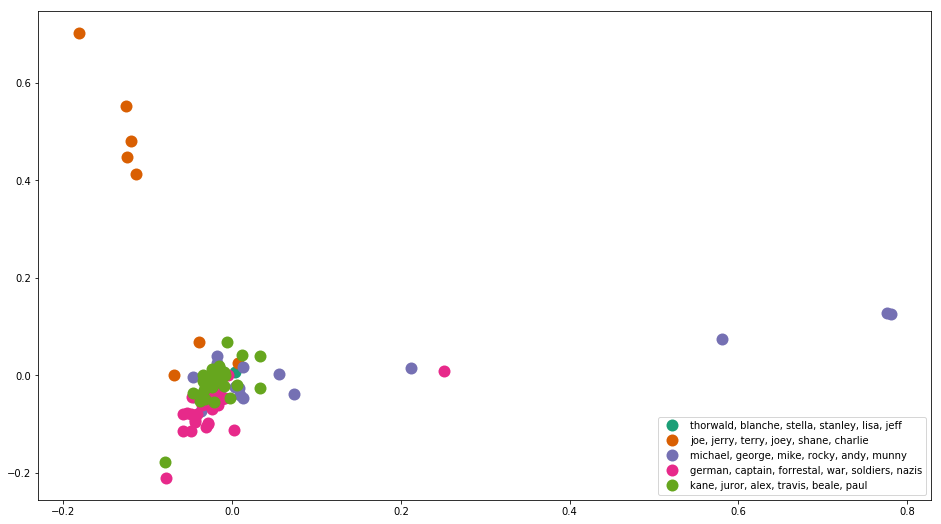

In [34]:
#create data frame with PCA cluster results
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 
groups = df.groupby(clusters)

# set up plot
fig, ax = plt.subplots(figsize=(16, 9))
#Set color for each cluster/group
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')

ax.legend(numpoints=1,loc=4)  #show legend with only 1 point, position is right bottom.

In [35]:
# Use LDA for clustering
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, learning_method = 'online')

In [36]:
# LDA requires integer values, keep first 3 digits
tfidf_matrix_lda = (tfidf_matrix * 100)
tfidf_matrix_lda = tfidf_matrix_lda.astype(int)

In [37]:
lda.fit(tfidf_matrix_lda)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [38]:
# topics and words matrix
topic_word = lda.components_
print(topic_word.shape)

(5, 2000)


In [39]:
n_top_words = 7
topic_keywords_list = []
for i, topic_dist in enumerate(topic_word):
    #Here we select top(n_top_words-1)
    lda_topic_words = np.array(tf_selected_words)[np.argsort(topic_dist)][:-n_top_words:-1] 
    for j in range(len(lda_topic_words)):
        lda_topic_words[j] = vocab_frame_dict[lda_topic_words[j]]
    topic_keywords_list.append(lda_topic_words.tolist())

In [40]:
# documents and topics matri
doc_topic = lda.transform(tfidf_matrix_lda)
print (doc_topic.shape)

(100, 5)


In [41]:
# print out the clusters and topics and titles of the movies
topic_doc_dict = {}
print ("<Document clustering result by LDA>")
for i in range(len(doc_topic)):
    topicID = doc_topic[i].argmax()
    if topicID not in topic_doc_dict:
        topic_doc_dict[topicID] = [titles[i]]
    else:
        topic_doc_dict[topicID].append(titles[i])
for i in topic_doc_dict:
    print ("Cluster " + str(i) + " words: " + ", ".join(topic_keywords_list[i]))
    print ("Cluster " + str(i) + " titles (" + str(len(topic_doc_dict[i])) + " movies): ")
    print (', '.join(topic_doc_dict[i]))
    print ()

<Document clustering result by LDA>
Cluster 2 words: michael, mcmurphy, maximus, rick, vito, neff
Cluster 2 titles (19 movies): 
The Godfather, Casablanca, One Flew Over the Cuckoo's Nest, Titanic, The Godfather: Part II, E.T. the Extra-Terrestrial, Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb, The Lord of the Rings: The Return of the King, Gladiator, Saving Private Ryan, A Streetcar Named Desire, The Best Years of Our Lives, The Deer Hunter, All Quiet on the Western Front, It Happened One Night, Mr. Smith Goes to Washington, Tootsie, Close Encounters of the Third Kind, Double Indemnity

Cluster 4 words: george, terry, juror, andy, jim, emma
Cluster 4 titles (21 movies): 
The Shawshank Redemption, Psycho, Vertigo, On the Waterfront, Chinatown, It's a Wonderful Life, 12 Angry Men, To Kill a Mockingbird, An American in Paris, The Apartment, High Noon, A Place in the Sun, Good Will Hunting, Terms of Endearment, Giant, The Green Mile, The Graduate, American Graffiti

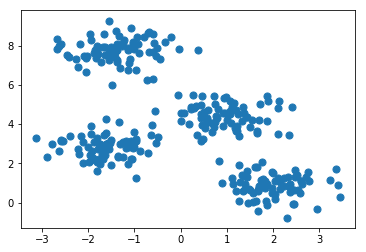

In [42]:
# An example of k-means, no relationship with above nlp case. The data is generated randomly.
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

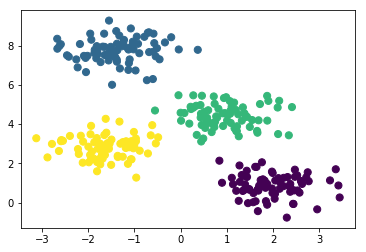

In [43]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50);